In [ ]:
# prompt: load and check missing values in email_spam

import pandas as pd

# Load the dataset (replace 'email_spam.csv' with your actual file path)
try:
    df = pd.read_csv('email_spam.csv')
except FileNotFoundError:
    print("Error: 'email_spam.csv' not found. Please provide the correct file path.")
    exit()

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# You can also get a percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percentage)


title            0
text             0
type             0
clean_text       0
simple_tokens    0
spacy_tokens     0
cleaned_text     0
dtype: int64

Percentage of missing values:
 title            0.0
text             0.0
type             0.0
clean_text       0.0
simple_tokens    0.0
spacy_tokens     0.0
cleaned_text     0.0
dtype: float64


In [ ]:
import pandas as pd
import re

def clean_text(text):
    """Function to clean text data."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df["clean_text"] = df["text"].apply(clean_text)
df.to_csv("/content/email_spam.csv", index=False)
print(df[["text", "clean_text"]].head())

                                                text  \
0  Hi James,\n\nHave you claim your complimentary...   
1  \nalt_text\nCongratulations, you just earned\n...   
2  Here's your GitHub launch code, @Mortyj420!\n ...   
3  Hello,\n \nThank you for contacting the Virtua...   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...   

                                          clean_text  
0  hi james have you claim your complimentary gif...  
1  alt_text congratulations you just earned 500 y...  
2  heres your github launch code mortyj420 an oct...  
3  hello thank you for contacting the virtual rew...  
4  hey prachanda rawal todays newsletter is jampa...  


In [ ]:
import pandas as pd
import spacy

if 'text' not in df.columns:
    raise ValueError("Dataset does not contain a 'text' column.")
df['simple_tokens'] = df['text'].astype(str).apply(lambda x: x.split())
try:
    nlp = spacy.blank("en")
except OSError:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en"])
    nlp = spacy.blank("en")
texts_list = df['text'].astype(str).tolist()
df['spacy_tokens'] = [list(doc) for doc in nlp.pipe(texts_list, batch_size=1000)]
output_file = "/content/email_spam.csv"
df.to_csv(output_file, index=False)
print(f"Tokenization completed. Processed file saved as: {output_file}")

Tokenization completed. Processed file saved as: /content/email_spam.csv


In [ ]:
# prompt: import pandas as pd
# import nltk
# from nltk.corpus import stopwords
# import string
# nltk.download('stopwords')
# file_path = "/content/HUMOUR_DETECTION.csv"
# df = pd.read_csv(file_path)
# stop_words = set(stopwords.words('english'))
# def remove_stopwords(text):
#     words = text.split()
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     return " ".join(filtered_words)
# df['text'] = df['text'].astype(str)
# df['cleaned_text'] = df['text'].apply(remove_stopwords)
# df.to_csv("cleaned_HUMOUR_DETECTION.csv", index=False)
# print(df[['text', 'cleaned_text']].head())
# use this code and replace the file with email_spam

import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re
import spacy
import subprocess

# Download required NLTK data
nltk.download('stopwords')

# Load the dataset
try:
    df = pd.read_csv('email_spam.csv')
except FileNotFoundError:
    print("Error: 'email_spam.csv' not found. Please provide the correct file path.")
    exit()

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percentage)

# Stop words removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

df['text'] = df['text'].astype(str)
df['cleaned_text'] = df['text'].apply(remove_stopwords)


# Text cleaning function (from the original code)
def clean_text(text):
    """Function to clean text data."""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)


# Tokenization (from the original code)
if 'text' not in df.columns:
    raise ValueError("Dataset does not contain a 'text' column.")
df['simple_tokens'] = df['text'].astype(str).apply(lambda x: x.split())
try:
    nlp = spacy.blank("en")
except OSError:
    subprocess.run(["python", "-m", "spacy", "download", "en"])
    nlp = spacy.blank("en")
texts_list = df['text'].astype(str).tolist()
df['spacy_tokens'] = [list(doc) for doc in nlp.pipe(texts_list, batch_size=1000)]

# Save the updated DataFrame
df.to_csv("/content/email_spam.csv", index=False)

# Print the first few rows of the relevant columns
print(df[['text', 'cleaned_text', "clean_text", 'simple_tokens', 'spacy_tokens']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title            0
text             0
type             0
clean_text       0
simple_tokens    0
spacy_tokens     0
cleaned_text     0
dtype: int64

Percentage of missing values:
 title            0.0
text             0.0
type             0.0
clean_text       0.0
simple_tokens    0.0
spacy_tokens     0.0
cleaned_text     0.0
dtype: float64
                                                text  \
0  Hi James,\n\nHave you claim your complimentary...   
1  \nalt_text\nCongratulations, you just earned\n...   
2  Here's your GitHub launch code, @Mortyj420!\n ...   
3  Hello,\n \nThank you for contacting the Virtua...   
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...   

                                        cleaned_text  \
0  Hi James, claim complimentary gift yet? compil...   
1  alt_text Congratulations, earned 500 completed...   
2  Here's GitHub launch code, @Mortyj420! octocat...   
3  Hello, Thank contacting Virtual Reward Center....   
4  Hey Prachanda Rawal, Today's newsletter 

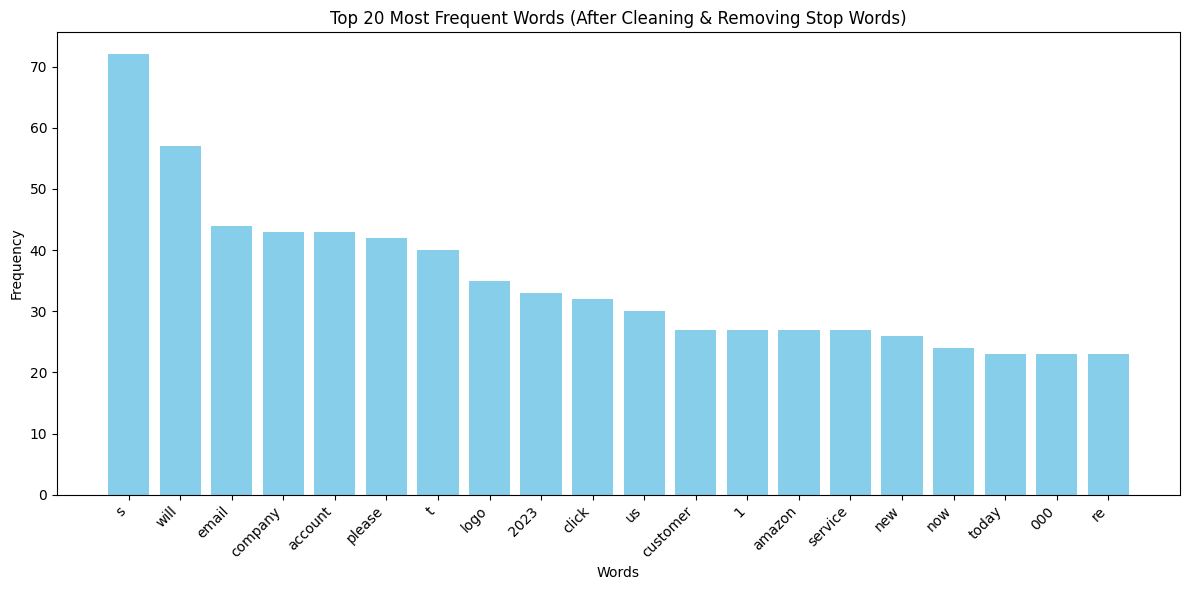

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS
import re

# Load the dataset
df = pd.read_csv('/content/email_spam.csv')

# Combine all text data from the 'text' column
all_text = " ".join(df["text"].astype(str))

# Basic cleaning and tokenization
tokens = re.findall(r'\b\w+\b', all_text.lower())

# Remove stop words
filtered_tokens = [word for word in tokens if word not in STOPWORDS]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Get top 20 most common words
common_words = word_freq.most_common(20)

# Separate words and their frequencies
words, frequencies = zip(*common_words)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words (After Cleaning & Removing Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import re
from scipy.stats import skew, kurtosis

# Load your dataset
df = pd.read_csv('/content/email_spam.csv')

# Calculate word count for each email
df['word_count'] = df['text'].astype(str).apply(lambda x: len(re.findall(r'\b\w+\b', x.lower())))

# Calculate skewness and kurtosis
word_count_skewness = skew(df['word_count'])
word_count_kurtosis = kurtosis(df['word_count'])

# Print results
print(f"Skewness: {word_count_skewness}")
print(f"Kurtosis: {word_count_kurtosis}")


Skewness: 3.540543807439139
Kurtosis: 15.18891615191868


<ipython-input-8-dcefa620e05f>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Email Type')


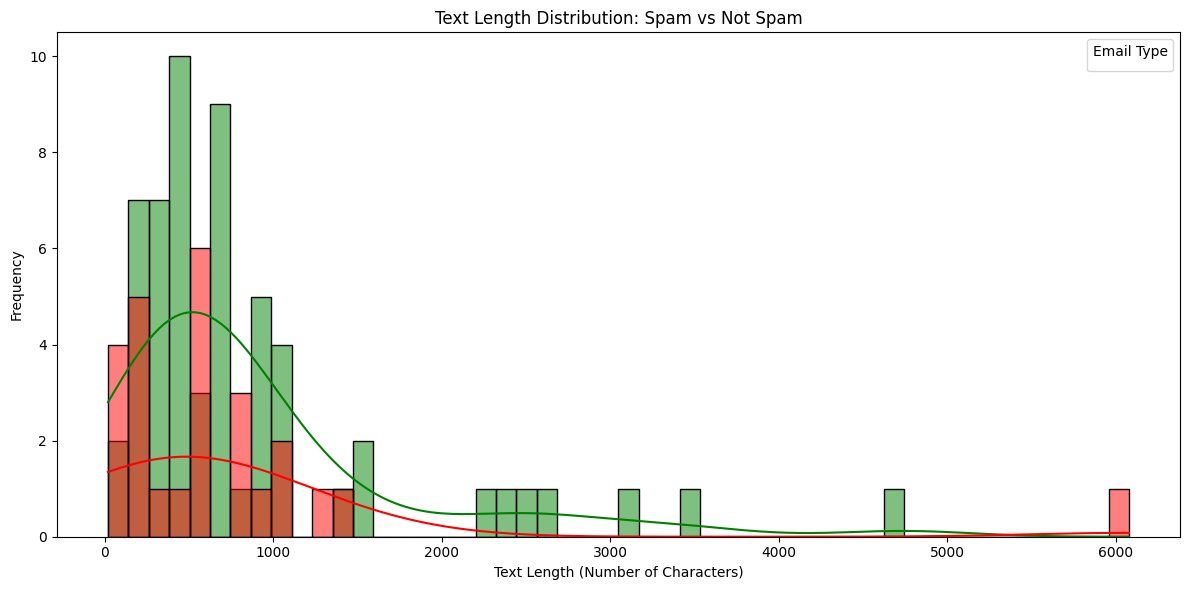


--- Summary Statistics ---
          count        mean          std   min     25%    50%     75%     max
type                                                                         
not spam   58.0  890.172414   912.381406  68.0  366.75  628.5  976.25  4745.0
spam       26.0  746.461538  1157.525092  19.0  184.25  530.5  799.25  6079.0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/email_spam.csv')

# Add a column for text length
df['text_length'] = df['text'].astype(str).apply(len)

# Plot histograms for spam vs not spam
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='type', bins=50, kde=True, palette={'spam': 'red', 'not spam': 'green'})
plt.title('Text Length Distribution: Spam vs Not Spam')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend(title='Email Type')
plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("\n--- Summary Statistics ---")
print(df.groupby('type')['text_length'].describe())


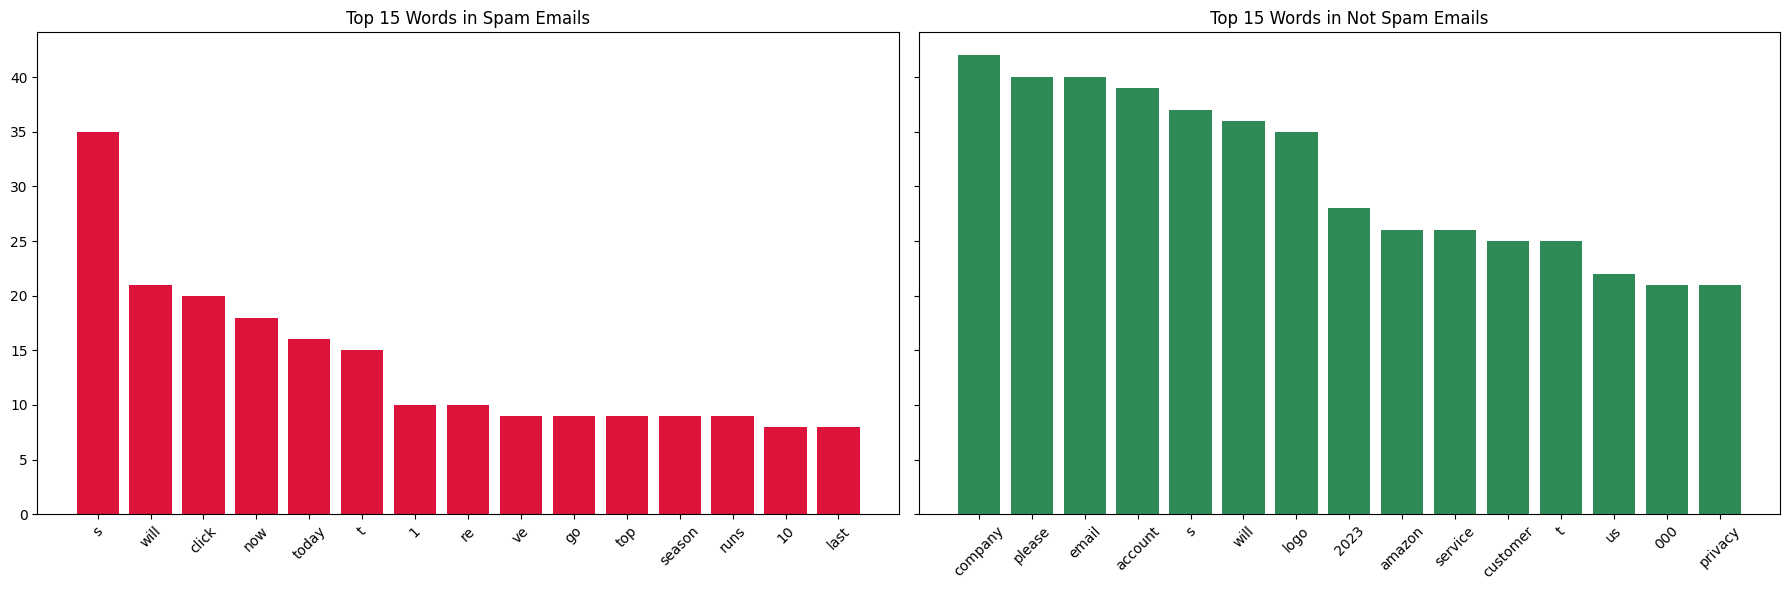

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS
import re

# Load dataset
df = pd.read_csv('/content/email_spam.csv')

# Define a function to preprocess and get word frequencies
def get_word_freq(texts):
    all_text = " ".join(texts.astype(str))
    tokens = re.findall(r'\b\w+\b', all_text.lower())
    filtered = [word for word in tokens if word not in STOPWORDS]
    return Counter(filtered)

# Get word frequencies for spam and not spam
spam_freq = get_word_freq(df[df['type'] == 'spam']['text'])
not_spam_freq = get_word_freq(df[df['type'] == 'not spam']['text'])

# Get top 15 common words
top_spam = spam_freq.most_common(15)
top_not_spam = not_spam_freq.most_common(15)

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Spam plot
spam_words, spam_counts = zip(*top_spam)
axes[0].bar(spam_words, spam_counts, color='crimson')
axes[0].set_title('Top 15 Words in Spam Emails')
axes[0].tick_params(axis='x', rotation=45)

# Not spam plot
not_spam_words, not_spam_counts = zip(*top_not_spam)
axes[1].bar(not_spam_words, not_spam_counts, color='seagreen')
axes[1].set_title('Top 15 Words in Not Spam Emails')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


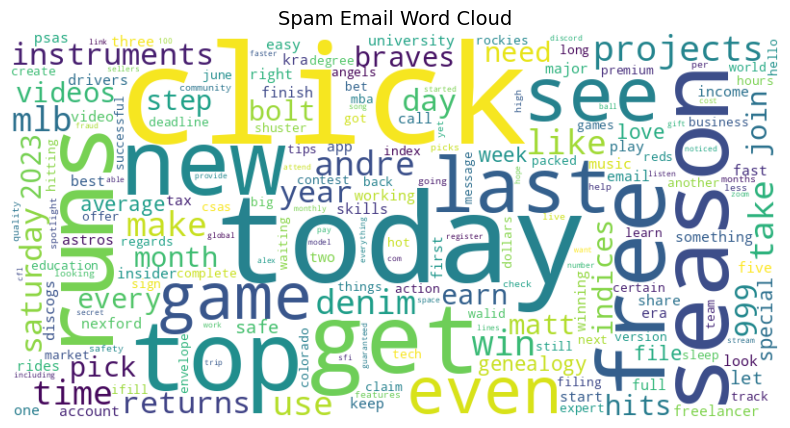

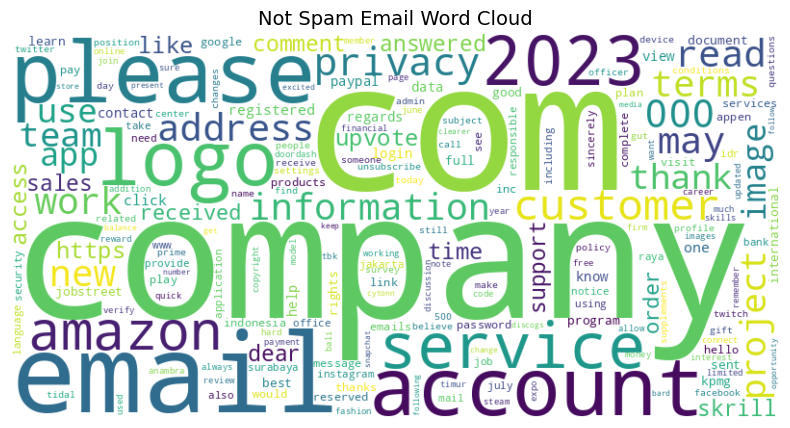

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall(r'\b\w{3,}\b', text.lower())  # words with 3 or more letters
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Function to get word frequencies
def get_word_frequencies(texts):
    all_words = []
    for text in texts:
        all_words.extend(preprocess_text(text))
    return dict(pd.Series(all_words).value_counts())

# Function to generate and display a word cloud
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Load dataset
file_path = '/content/email_spam.csv'
df = pd.read_csv(file_path)

# Filter texts by type
spam_texts = df[df['type'] == 'spam']['text'].dropna()
not_spam_texts = df[df['type'] == 'not spam']['text'].dropna()

# Get word frequencies
spam_freq = get_word_frequencies(spam_texts)
not_spam_freq = get_word_frequencies(not_spam_texts)

# Generate word clouds
generate_wordcloud(spam_freq, "Spam Email Word Cloud")
generate_wordcloud(not_spam_freq, "Not Spam Email Word Cloud")


Most Common Bigrams: [(('in', 'the'), 40), (('company', 'logo'), 31), (('If', 'you'), 29), (('on', 'the'), 20), (('of', 'the'), 20), (('for', 'the'), 19), (('to', 'the'), 18), (('you', 'for'), 15), (('to', 'your'), 15), (('for', 'your'), 15)]
Most Common Trigrams: [(('Read', 'more', '»'), 14), (('more', '»', 'Upvote'), 14), (('Thank', 'you', 'for'), 12), (('company', 'logo', 'Customer'), 9), (('logo', 'Customer', 'Service'), 9), (('All', 'rights', 'reserved.'), 8), (('If', 'you', 'have'), 7), (('you', 'need', 'to'), 6), (('Anambra', 'Fashion', 'Expo'), 6), (('Fashion', 'Expo', '2023'), 6)]


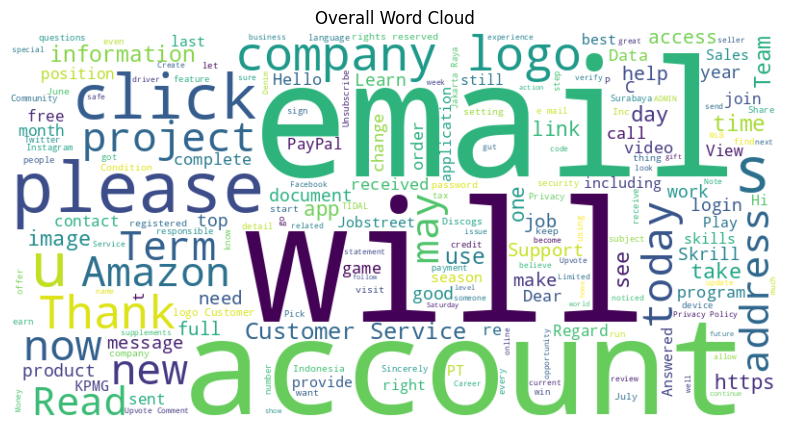

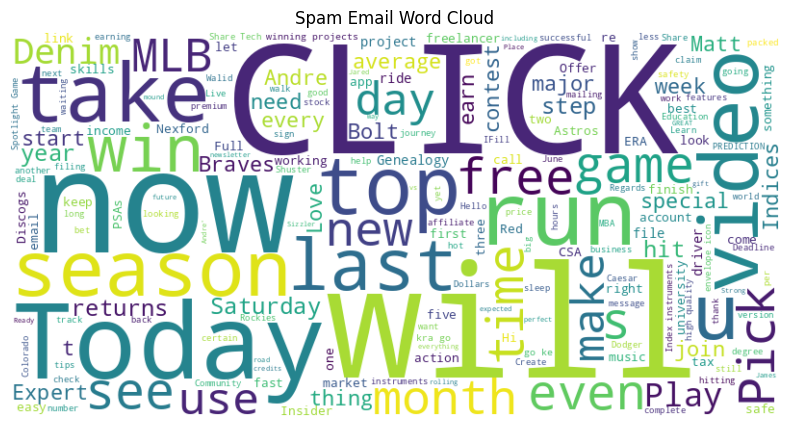

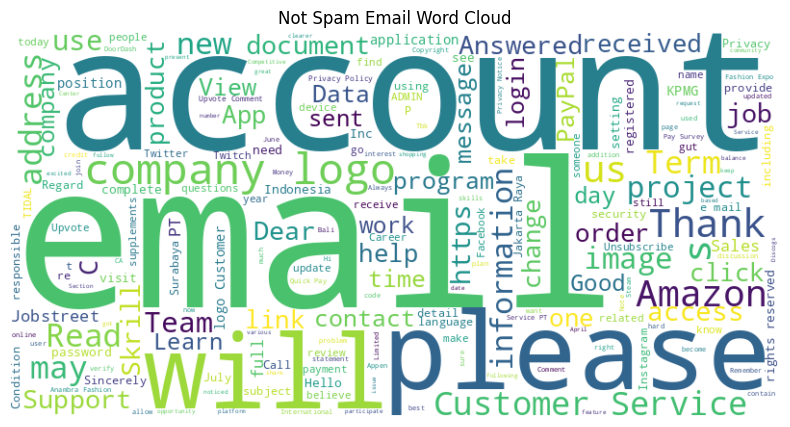

In [14]:
import pandas as pd
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset
df = pd.read_csv('/content/email_spam.csv')

# Function to extract n-grams
def get_ngrams(texts, n=2):
    all_ngrams = []
    for text in texts.dropna():
        all_ngrams.extend(ngrams(text.split(), n))
    return Counter(all_ngrams)

# Extract bigrams and trigrams
bigram_counts = get_ngrams(df['text'], n=2)
trigram_counts = get_ngrams(df['text'], n=3)

# Print most common ones
print("Most Common Bigrams:", bigram_counts.most_common(10))
print("Most Common Trigrams:", trigram_counts.most_common(10))

# Function to generate a word cloud
def generate_wordcloud(texts, title="Word Cloud"):
    text = ' '.join(str(t) for t in texts.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds
generate_wordcloud(df['text'], title="Overall Word Cloud")
generate_wordcloud(df[df['type'] == 'spam']['text'], title="Spam Email Word Cloud")
generate_wordcloud(df[df['type'] == 'not spam']['text'], title="Not Spam Email Word Cloud")


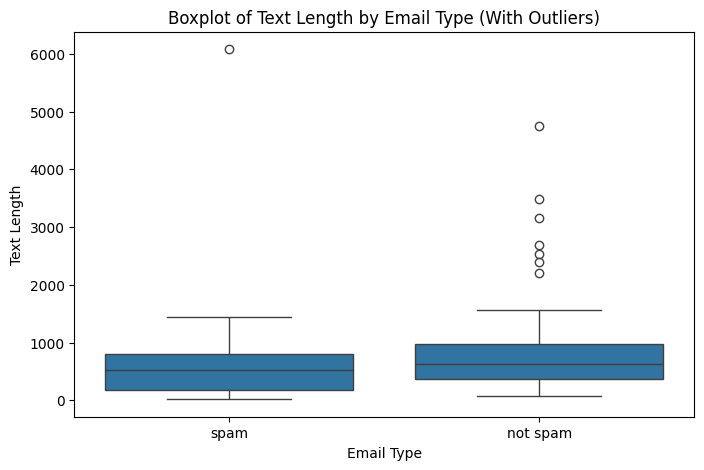

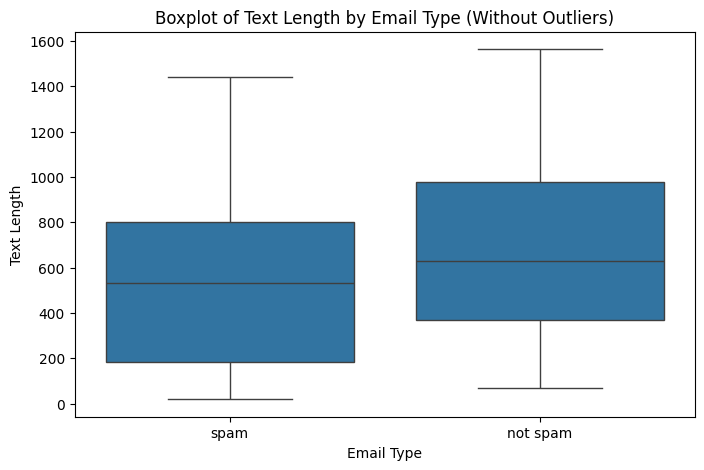

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    return pd.read_csv(file_path)

def add_text_length(df):
    df['text_length'] = df['text'].apply(len)
    return df

def plot_boxplot_with_outliers(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='type', y='text_length', data=df)
    plt.title("Boxplot of Text Length by Email Type (With Outliers)")
    plt.xlabel("Email Type")
    plt.ylabel("Text Length")
    plt.show()

def plot_boxplot_without_outliers(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='type', y='text_length', data=df, showfliers=False)
    plt.title("Boxplot of Text Length by Email Type (Without Outliers)")
    plt.xlabel("Email Type")
    plt.ylabel("Text Length")
    plt.show()

def main(file_path):
    df = load_data(file_path)
    df = add_text_length(df)
    plot_boxplot_with_outliers(df)
    plot_boxplot_without_outliers(df)

main("email_spam.csv")


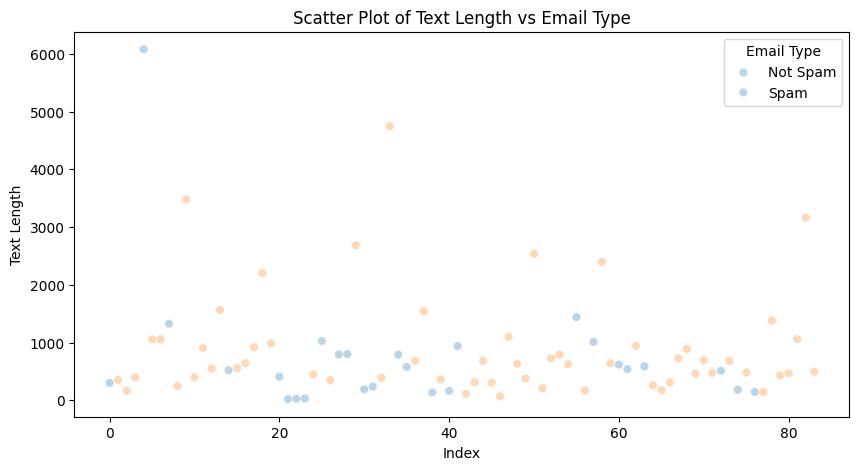

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "email_spam.csv"
df = pd.read_csv(file_path)
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['text_length'], hue=df['type'], alpha=0.3)
plt.xlabel("Index")
plt.ylabel("Text Length")
plt.title("Scatter Plot of Text Length vs Email Type")
plt.legend(title="Email Type", labels=["Not Spam", "Spam"])
plt.show()


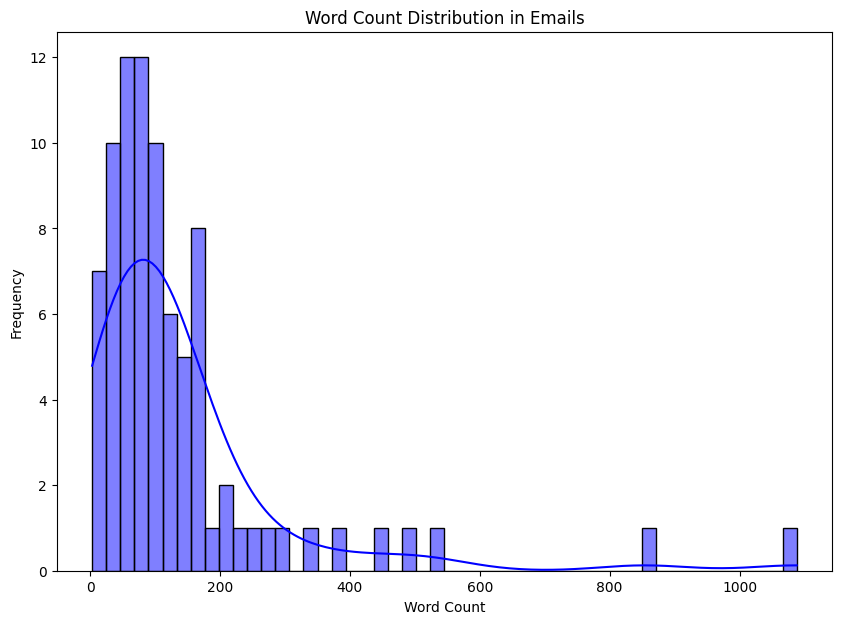

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "email_spam.csv"
df = pd.read_csv(file_path)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 7))
sns.histplot(df['word_count'], bins=50, kde=True, color='blue')
plt.title("Word Count Distribution in Emails")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [21]:
pip install pandas scikit-learn gensim tensorflow tensorflow-hub nltk

In [22]:
pip install vaderSentiment

In [23]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=df7b70770d88666a518972b8a7d1f1a0ca63f5c6d8359a3bee3175b29b10e90d
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [24]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess data
data_path = "email_spam.csv"
df = pd.read_csv(data_path, low_memory=False)
df.dropna(inplace=True)

# Convert 'type' to binary: spam -> 1, not spam -> 0
df['type'] = df['type'].map({'spam': 1, 'not spam': 0})

X = df['text']
y = df['type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log = log_reg.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("\nNaïve Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17

Accuracy: 0.6470588235294118

Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17

Accuracy: 0.6470588235294118


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [27]:
!pip install --upgrade numpy tensorflow tensorflow-hub

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('email_spam.csv')
df.dropna(inplace=True)
df['type'] = df['type'].map({'spam': 1, 'not spam': 0})

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed text
def embed_text(text_list):
    return use_model(text_list).numpy()

X = embed_text(df['text'].tolist())
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.5),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("spam_detection_use_lstm.h5")

# Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv("lstm_training_history.csv", index=False)
print("Training history saved to lstm_training_history.csv")

# Reload model for prediction
loaded_model = load_model("spam_detection_use_lstm.h5")

# Prediction function
def predict_spam(text):
    embedding = embed_text([text])
    embedding = embedding.reshape((embedding.shape[0], embedding.shape[1], 1))
    prediction = loaded_model.predict(embedding)[0][0]
    return "Spam" if prediction > 0.5 else "Not Spam"

# Test example
example_text = "Congratulations! You've won a free iPhone. Click here to claim now."
print(f"Prediction: {predict_spam(example_text)}")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 737ms/step - accuracy: 0.6061 - loss: 0.6927 - val_accuracy: 0.6471 - val_loss: 0.6902
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.6867 - loss: 0.6881 - val_accuracy: 0.6471 - val_loss: 0.6851
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 460ms/step - accuracy: 0.7179 - loss: 0.6802 - val_accuracy: 0.6471 - val_loss: 0.6785
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.6945 - loss: 0.6713 - val_accuracy: 0.6471 - val_loss: 0.6689
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - accuracy: 0.7257 - loss: 0.6516 - val_accuracy: 0.6471 - val_loss: 0.6579


Training history saved to lstm_training_history.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
Prediction: Not Spam


In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("email_spam.csv")
df.dropna(inplace=True)
df['type'] = df['type'].map({'spam': 1, 'not spam': 0})

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed the text
def embed_text(text_list):
    return use_model(text_list).numpy()

X = embed_text(df['text'].tolist())
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for BiLSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build Bi-LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("spam_detection_use_bilstm.h5")

# Save training history
history_df = pd.DataFrame(history.history)
history_df.to_csv("bilstm_training_history.csv", index=False)
print("BiLSTM training history saved to bilstm_training_history.csv")

# Reload model for prediction
loaded_model = load_model("spam_detection_use_bilstm.h5")

# Prediction function
def predict_spam(text):
    embedding = embed_text([text])
    embedding = embedding.reshape((embedding.shape[0], embedding.shape[1], 1))
    prediction = loaded_model.predict(embedding)[0][0]
    return "Spam" if prediction > 0.5 else "Not Spam"

# Example prediction
example_text = "Congratulations! You have won a free ticket to Bahamas. Click now to claim!"
print(f"Prediction: {predict_spam(example_text)}")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5719 - loss: 0.6916 - val_accuracy: 0.6471 - val_loss: 0.6821
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 851ms/step - accuracy: 0.6867 - loss: 0.6761 - val_accuracy: 0.6471 - val_loss: 0.6680
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 868ms/step - accuracy: 0.7140 - loss: 0.6523 - val_accuracy: 0.6471 - val_loss: 0.6524
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 783ms/step - accuracy: 0.6945 - loss: 0.6273 - val_accuracy: 0.6471 - val_loss: 0.6582
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7179 - loss: 0.6058 - val_accuracy: 0.6471 - val_loss: 0.7217


BiLSTM training history saved to bilstm_training_history.csv


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
Prediction: Not Spam


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 712ms/step - accuracy: 0.5879 - loss: 0.6929 - val_accuracy: 0.6471 - val_loss: 0.6904
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.7140 - loss: 0.6889 - val_accuracy: 0.6471 - val_loss: 0.6874
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.7062 - loss: 0.6840 - val_accuracy: 0.6471 - val_loss: 0.6811
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - accuracy: 0.7218 - loss: 0.6732 - val_accuracy: 0.6471 - val_loss: 0.6704
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 763ms/step - accuracy: 0.7140 - loss: 0.6558 - val_accuracy: 0.6471 - val_loss: 0.6543
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5759 - loss: 0.6924 - val_accuracy: 0.6471 - val_loss: 0.6884
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 884ms/step - accuracy: 0.6906 - loss: 0.6860 - val_accuracy: 0.6471 - val_loss: 0.6829
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 863ms/step - accuracy: 0.7140 - loss: 0.6764 - val_accuracy: 0.6471 - val_loss: 0.6722
Epoch 4/5
3/

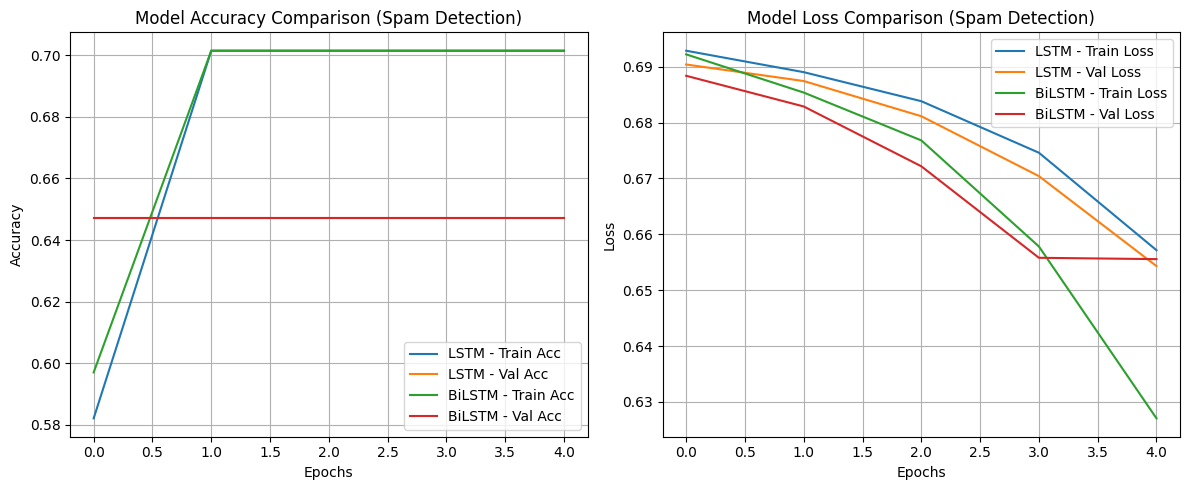

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("email_spam.csv")
df.dropna(inplace=True)
df['type'] = df['type'].map({'spam': 1, 'not spam': 0})  # Map labels

# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Embed text
def embed_text(text_list):
    return use_model(text_list).numpy()

X = embed_text(df['text'].tolist())
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM/BiLSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

# BiLSTM Model
bilstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_history = bilstm_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Plot Comparison Graphs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM - Train Acc')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM - Val Acc')
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM - Train Acc')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM - Val Acc')
plt.title("Model Accuracy Comparison (Spam Detection)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM - Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM - Val Loss')
plt.plot(bilstm_history.history['loss'], label='BiLSTM - Train Loss')
plt.plot(bilstm_history.history['val_loss'], label='BiLSTM - Val Loss')
plt.title("Model Loss Comparison (Spam Detection)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
